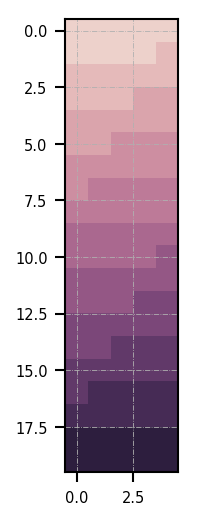

In [1]:
#### NOTE THIS IS A CODE TO COMPARE PERTURBATION OF MODEL TO UNPERTURBED CASE ######


%matplotlib inline
from netCDF4 import Dataset
from pylab import *
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from spharm import Spharmt
from tqdm import tqdm
from matplotlib.backends.backend_pdf import PdfPages

from matplotlib.ticker import AutoMinorLocator

# cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
cmap = ListedColormap(sns.cubehelix_palette(11).as_hex())
sns.reset_orig()

matplotlib.rcParams['lines.linewidth'] = 0.6

matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['font.size'] = 7
matplotlib.rcParams['legend.frameon'] = False

matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['axes.facecolor'] = '#F8F8FF'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['axes.labelsize'] = 7

matplotlib.rcParams['grid.linestyle'] = '-.'
matplotlib.rcParams['grid.linewidth'] = 0.4

matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['xtick.minor.size'] = 3
matplotlib.rcParams['xtick.minor.width'] = 0.7

matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.7

imshow(np.arange(100).reshape((20,5)), cmap=cmap)

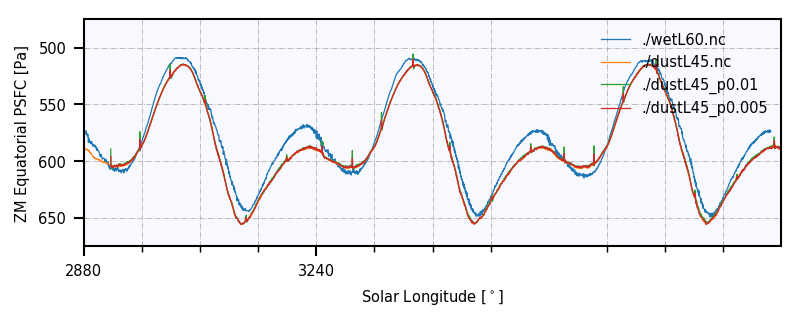

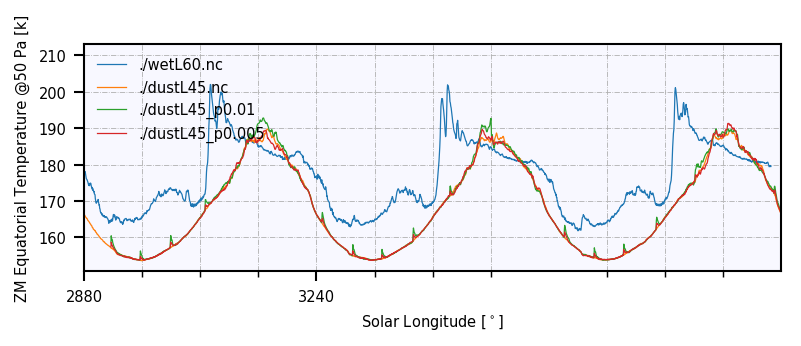

In [2]:
from netCDF4 import Dataset

major_ticks = np.arange(0, 360*10, 360)  

## functions that will add multiples of 360 to new years
def yearly_ls(ls):
    idx = np.where(ls==360)[0]
    counter = 1
    for i in np.arange(idx.size-1):
        ls[idx[i]:idx[i+1]] += counter*360
        ls[idx[i]] -= 360
        counter += 1
    if idx.size == 1:
        i = 0
        ls[idx[i]:] += counter*360
        ls[idx[i]] -= 360
    else:
        ls[idx[i+1]:] += counter*360
        ls[idx[i+1]] -= 360
    return ls

# wet data, equatorial
filedir_d = './wetL60.nc'
data = Dataset(filedir_d,'r')
psfcwet = data.variables['PSFC'][:][:,17:20].mean(axis=2).mean(axis=1)
twet = data.variables['T50Pa'][:][:,17:20].mean(axis=2).mean(axis=1)
ls = data.variables['LS'][:]
ls = yearly_ls(ls)

# dust data, equatorial
filedir_w = './dustL45.nc'
data = Dataset(filedir_w,'r')
psfcdust = data.variables['PSFC'][:][:,17:20].mean(axis=2).mean(axis=1)
tdust = data.variables['T50Pa'][:][:,17:20].mean(axis=2).mean(axis=1)
lsdust = data.variables['LS'][:]
lsdust = yearly_ls(lsdust)

# dust perturbation, equatorial
filedir_dp = './dustL45_p0.01.nc'
data = Dataset(filedir_dp,'r')
psfcdustp = data.variables['PSFC'][:][:,17:20].mean(axis=2).mean(axis=1)
tdustp = data.variables['T50Pa'][:][:,17:20].mean(axis=2).mean(axis=1)
lsdustp = data.variables['LS'][:] 
lsdustp = yearly_ls(lsdustp) + 2880


# dust perturbation, equatorial
filedir_wp = './dustL45_p0.005.nc'
data = Dataset(filedir_wp,'r')
psfcwetp = data.variables['PSFC'][:][:,17:20].mean(axis=2).mean(axis=1)
twetp = data.variables['T50Pa'][:][:,17:20].mean(axis=2).mean(axis=1)
lswetp = data.variables['LS'][:]
lswetp = yearly_ls(lswetp) + 2880

# just plotting zonally mean temperature and psfc
with PdfPages('model_comp.pdf') as pdFigures:
    full_arr = 2000
    fig, ax = plt.subplots(figsize=(6,2))
    plot(ls[:], psfcwet[:], label=filedir_d.replace('_test.nc',''))
    plot(lsdust[:], psfcdust, label=filedir_w.replace('_test.nc',''))
    plot(lsdustp[:],psfcdustp, label=filedir_dp.replace('.nc',''))
    plot(lswetp[:],psfcwetp, label=filedir_wp.replace('.nc',''))
    ylabel('ZM Equatorial PSFC [Pa]')
    xlabel('Solar Longitude [$^\circ$]')
    xticks(major_ticks)
    xlim([2880,3960])
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid(True, which='both')
    ylim([675,475])
    legend()
#     plt.savefig(pdFigures,  format='pdf', bbox_inchesf='tight', dpi=400)

    fig, ax = plt.subplots(figsize=(6,2))
    plot(ls[:], twet[:], label=filedir_d.replace('_test.nc',''))
    plot(lsdust[:],tdust, label=filedir_w.replace('_test.nc',''))
    plot(lsdustp[:],tdustp, label=filedir_dp.replace('.nc',''))
    plot(lswetp[:],twetp, label=filedir_wp.replace('.nc',''))
    ylabel('ZM Equatorial Temperature @50 Pa [k]')
    xlabel('Solar Longitude [$^\circ$]')
    xticks(major_ticks)
    xlim([2880,3960])
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid(True, which='both')
    legend()
#     plt.savefig(pdFigures,  format='pdf', bbox_inches='tight', dpi=400)

(600, 36, 72) (600, 36, 72)
(600, 36, 72) (600, 36, 72)
(1920, 36, 72) (1920, 36, 72)
(1891, 36, 72) (1891, 36, 72)
(1920, 36, 72) (1920, 36, 72)
(1920, 36, 72) (1920, 36, 72)


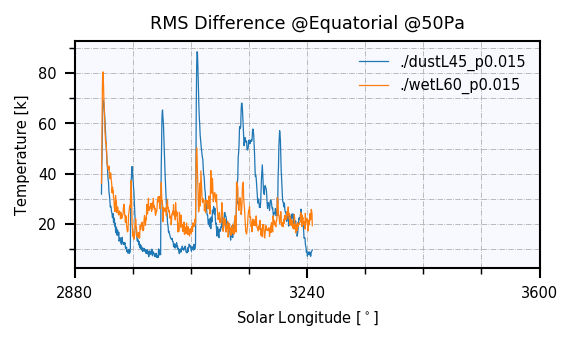

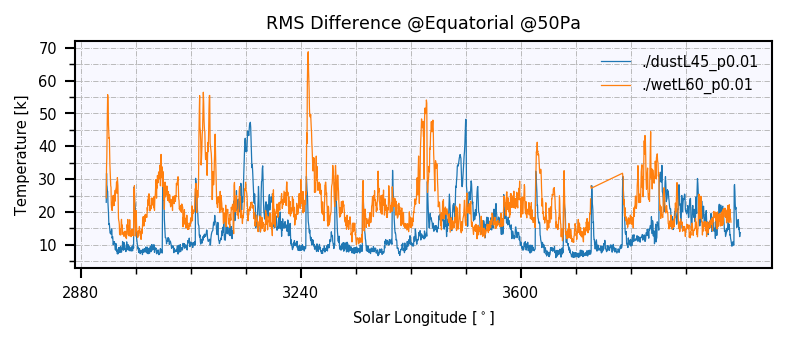

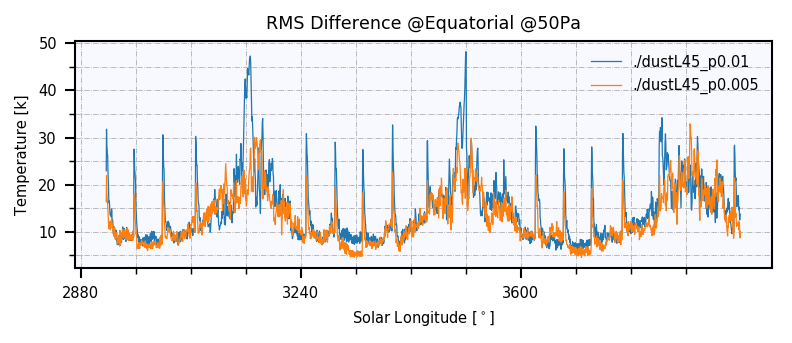

In [3]:
major_ticks = np.arange(2880, 2880+360*3, 360) 
def rmsTimeseries(rawfiledir, pertfiledir, pert):
    
    data = Dataset(rawfiledir,'r')
    ls = data.variables['LS'][:]
    ls = yearly_ls(ls) 
    tsk = data.variables['T50Pa'][:]#[:,17:20].mean(axis=2).mean(axis=1)
    
    data = Dataset(pertfiledir,'r')
    lsp = data.variables['LS'][:]
    lsp = yearly_ls(lsp) + 2880
    tskp = data.variables['T50Pa'][:]#[:,17:20].mean(axis=2).mean(axis=1)
    
    # accounting for discontinuity in LS and adding np.nan to fill the discontinuity
    if np.where(np.diff(np.diff(lsp))>1)[0]:
        disCon = int(np.where(np.diff(np.diff(lsp))>1)[0][0])
        lsp = lsp.tolist()
        lsp[disCon:disCon] = np.empty((100))*np.nan
        lsp =  np.array(lsp)
        
        tmp = tskp[:disCon]
        tskp = np.concatenate((tmp, np.empty((100,36,72))*np.nan, tskp[disCon:]), axis=0)
    
    idx = np.where(ls == lsp[0])[0][0]
    ls = ls[idx:]
    tsk = tsk[idx:]
    
    # adjusting for when ls is starting in data set
    if ls.shape > lsp.shape:
        idx2 = np.where(ls==lsp[-1])[0][0]
        ls = ls[:idx2+1]
        tsk = tsk[:idx2+1]
    else:
        idx2 = np.where(lsp==ls[-1])[0][0]
#         tsk = tsk[:idx2+1]
        tskp = tskp[:idx2+1]
        lsp = lsp[:idx2+1]
    print (tsk.shape,tskp.shape)
        
    # calculating rms
    equatorial_rms = np.sqrt(np.abs(tsk**2-tskp**2))[:,17:20].mean(axis=2).mean(axis=1)
    
    plot(lsp, equatorial_rms, label=pertfiledir.replace('.nc',''))
    title("RMS Difference @Equatorial @50Pa")
    ylabel("Temperature [k]")
    xlabel("Solar Longitude [$^\circ$]")
    
    xticks(major_ticks)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid(True, which='both')
    legend()

fig, ax = plt.subplots(figsize=(4,2))
rmsTimeseries('./dustL45.nc', './dustL45_p0.015.nc', "0.01")
rmsTimeseries('./wetL60.nc', './wetL60_p0.015.nc', "0.015")

# fig, ax = plt.subplots(figsize=(6,2))
with PdfPages('rms_difference.pdf') as pdFigures:
    fig, ax = plt.subplots(figsize=(6,2))
    rmsTimeseries('./dustL45.nc', './dustL45_p0.01.nc', "0.01")
    rmsTimeseries('./wetL60.nc', './wetL60_p0.01.nc', "0.01")
    plt.savefig(pdFigures,  format='pdf', bbox_inches='tight', dpi=400)
    
    fig, ax = plt.subplots(figsize=(6,2))
    rmsTimeseries('./dustL45.nc', './dustL45_p0.01.nc', "0.01")
    rmsTimeseries('./dustL45.nc', './dustL45_p0.005.nc', "0.015")
    plt.savefig(pdFigures,  format='pdf', bbox_inches='tight', dpi=400)

(36, 2, 36)


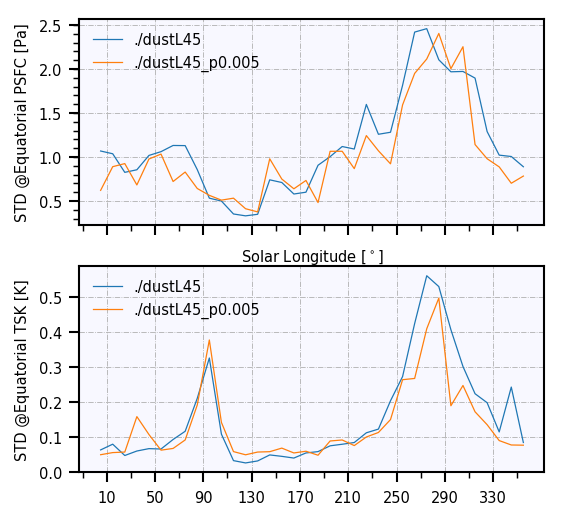

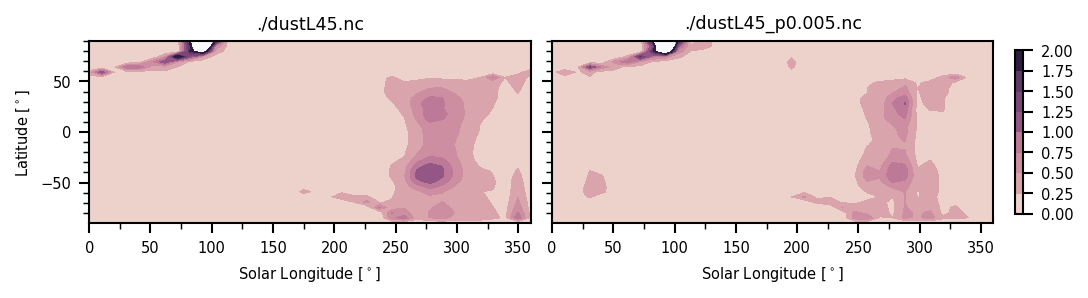

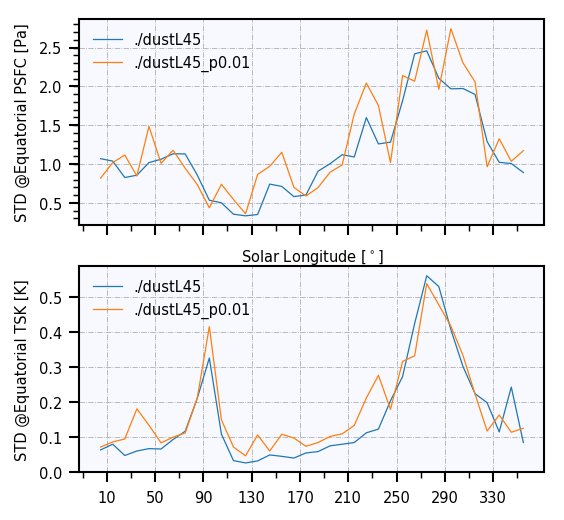

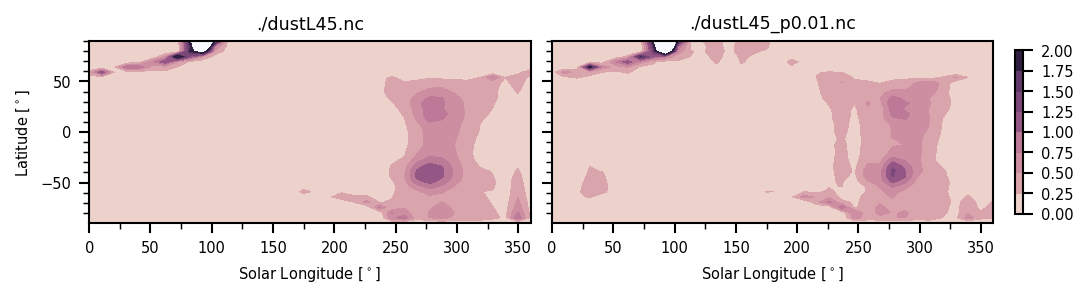

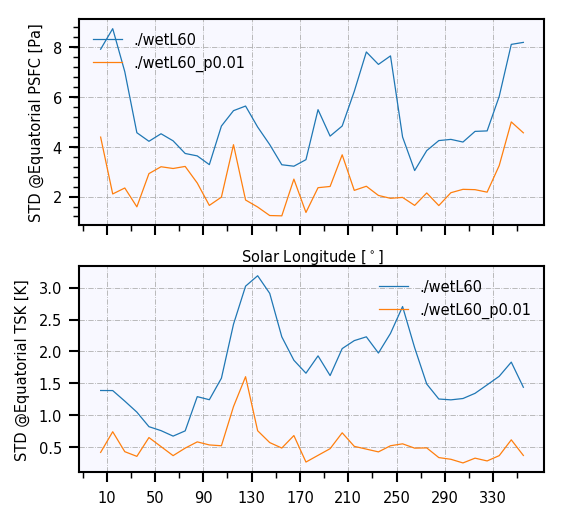

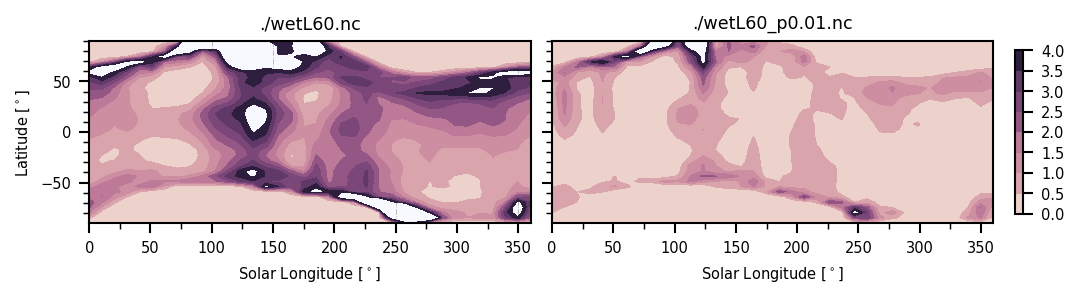

In [4]:
# specifying the period we want
period = 10
# specifying the number of data point we would have
ndata = int(360/period)

def yearlyVariation(rawdata, pertdata):
    filedir = rawdata
    data = Dataset(filedir,'r')
    ls = data.variables['LS'][:][:]
    psfc = data.variables['PSFC'][:][:]
    tsk = data.variables['TSK'][:][:]
    t = data.variables['T50Pa'][:][:]

    filedir = pertdata
    data = Dataset(filedir,'r')
    lsp = data.variables['LS'][:]#[:6690]
    psfcp = data.variables['PSFC'][:]
    tskp = data.variables['TSK'][:]
    tp = data.variables['T50Pa'][:]

    def meanSTD(ls, period, i, data):
        # indexes corresponding to certain period of LS
        idx = np.where(abs(ls-(i*period+period/2))<period/2)[0]
    
        # indexes corresponding to another year 
        idx_year = np.where(np.diff(idx)>1)[0]
        tmp = []
        if idx_year.size == 0: # case where it is only one year
            tmp.append( data[idx].mean(axis=0) )
        for j in np.arange(idx_year.size): # indexing through the different years and collecting all data within the same LS period
            # note that we have to take the mean along LS first
            if j == 0:
                tmp.append( data[idx[0:idx_year[j]+1]].mean(axis=0) )
            if j == idx_year.size-1:
                tmp.append( data[idx[idx_year[j]+1:]].mean(axis=0) )
            else:
                tmp.append( data[idx[idx_year[j]+1:idx_year[j+1]+1]].mean(axis=0) )
        tmp = np.array(tmp)
        # return mean of the standard devation (period, data, longitude)
        return tmp.std(axis=0).mean(axis=1)

    vart = np.zeros((ndata,2,36))
    varp = np.zeros((ndata,2,36))
    for i in np.arange(ndata): # going through the different periods
        test = meanSTD(ls, period, i, psfc)
        test2 = meanSTD(lsp, period, i, psfcp)
        # stacking the unperturbed data and perturbed into one dataset
        varp[i] = np.vstack((test, test2))

        test = meanSTD(ls, period, i, tsk)
        test2 = meanSTD(lsp, period, i, tskp)
        vart[i] = np.vstack((test, test2))
        
    return varp, vart

# specifying axis labeling
major_ticks = np.arange(10,370,40)
xaxis = np.arange(5,365,period)

# plotting data for equatorial mean std
def stdplot(xaxis, stdpressure, stdtsk, rawlabel, pertlabel, title):
    varp = stdpressure.mean(axis=2) # mean along latitude
    vart = stdtsk.mean(axis=2)
    
    fig, (ax, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(4,4), sharex=True)
    ax.plot(xaxis, varp[:,0], label=rawlabel.replace('.nc','')) # unperturbed
    ax.plot(xaxis, varp[:,1], label=pertlabel.replace('.nc','')) # perturbed
    ax.set_xticks(major_ticks)
    ax.set_ylabel(title)
    ax.set_xlabel('Solar Longitude [$^\circ$]')
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.legend()

    ax2.plot(xaxis, vart[:,0], label=rawlabel.replace('.nc',''))
    ax2.plot(xaxis, vart[:,1], label=pertlabel.replace('.nc',''))
    ax2.set_ylabel(title.replace('PSFC [Pa]', 'TSK [K]'))
#     ax2.set_xlabel('Solar Longitude [$^\circ$]')
    ax2.legend()
    
    #plt.savefig(pdFigures,  format='pdf', bbox_inches='tight', dpi=400)
    
# plotting data for full mean std (in term of latitude and ls)
def stdplot_contour(xaxis, stdpressure, stdtsk, label, levels):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,2), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flat):
        im = ax.contourf(np.linspace(0,360, 36), np.linspace(-90,90,36), stdtsk[:,i].T, levels = levels, cmap=cmap)
        ax.set_title(label[i])
        ax.set_xlabel('Solar Longitude [$^\circ$]')
        ax.xaxis.set_minor_locator(AutoMinorLocator(2))
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))
        
        if i in [0]:
            ax.set_ylabel('Latitude [$^\circ$]')

    fig.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.9, orientation='vertical', pad=0.02)
    
    #plt.savefig(pdFigures,  format='pdf', bbox_inches='tight', dpi=400)
    
    
with PdfPages('std_model_comp.pdf') as pdFigures:
    varp, vart = yearlyVariation('./dustL45.nc', './dustL45_p0.005.nc')
    stdplot(xaxis, varp, vart, './dustL45.nc', './dustL45_p0.005.nc', 'STD @Equatorial PSFC [Pa]')
    stdplot_contour(xaxis, varp, vart, ['./dustL45.nc', './dustL45_p0.005.nc'],  np.linspace(0,2,9))
    
    varp, vart = yearlyVariation('./dustL45.nc', './dustL45_p0.01.nc')
    stdplot(xaxis, varp, vart, './dustL45.nc', './dustL45_p0.01.nc', 'STD @Equatorial PSFC [Pa]')
    stdplot_contour(xaxis, varp, vart, ['./dustL45.nc', './dustL45_p0.01.nc'],  np.linspace(0,2,9))
    
    varp, vart = yearlyVariation('./wetL60.nc', './wetL60_p0.01.nc')
    stdplot(xaxis, varp, vart, './wetL60.nc', './wetL60_p0.01.nc', 'STD @Equatorial PSFC [Pa]')
    stdplot_contour(xaxis, varp, vart, ['./wetL60.nc', './wetL60_p0.01.nc'],  np.linspace(0,4,9))

In [ ]:
def animatedDiff(old_data, new_data):
    import matplotlib.animation as animation
    FFwriter = animation.FFMpegWriter()
    
    fig = plt.figure()
    
    images = []
    for i in tqdm(np.arange(new_data.shape[0])[500:]):
        im = plt.contourf(np.linspace(-180,180,72), np.linspace(-90,90,36), np.abs(old_data[4800+i]-new_data[i]))
#         im = im.collections
        def setvisible(self,vis):
            for c in self.collections: c.set_visible(vis)
        def setanimated(self,ani):
            for c in self.collections: c.set_animated(ani)
                
        im.set_visible = types.MethodType(setvisible,im)
        im.set_animated = types.MethodType(setanimated,im)
        im.axes = plt.gca()
        im.figure=fig
    
#         plt.colorbar()
        images.append([im])
    
    ani = animation.ArtistAnimation(fig, images, interval=70, blit=False,repeat_delay=1000)
#     ani.save('basic_animation.mp4', writer = FFwriter)
    ani.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
    plt.show()
    

# dust data
filedir = './dustL45_test.nc'
data = Dataset(filedir,'r')
psfc = data.variables['TSK'][:]
t = data.variables['T50Pa'][:]
ls = data.variables['LS'][:]
ls = yearly_ls(ls)

# dust perturbation high res scale
filedir = './dustL45_p0.01.nc'
data = Dataset(filedir,'r')
psfcp = data.variables['TSK'][:]
tp = data.variables['T50Pa'][:]
lsp = data.variables['LS'][:]
lsp = yearly_ls(lsp) + 2880


idx = np.where(ls==lsp[0])[0][0]
idx2 = np.where(ls==lsp[-1])[0][0]

# figure(1)
# contourf(np.arange(psfcp.shape[0]), np.linspace(-180,180,72), np.sqrt(np.abs(psfc[idx:idx2+1,30]**2-psfcp[:,30]**2)).T)
# #xlim([0,50])
# colorbar()

figure(2)
contourf(np.linspace(-180,180,72), np.linspace(-90,90,36), (np.abs(psfc[4980]-psfcp[100])))
colorbar()

# animatedDiff(psfc, psfcp)


In [ ]:
fig = plt.figure()
import matplotlib.animation as animation
def animate(i): 
    if i%20 ==0: print (i)
    z = np.abs(t[4880+(i*5)] - tp[i*5]) 
    cont = plt.contourf(z, np.linspace(0,40,21))
    title('Sols {}'.format(i*5))
#     if (tslice == 0)
#         plt.title(r't = %1.2e' % t[i] )
#     else:
#         plt.title(r't = %i' % i)

    return cont
anim = animation.FuncAnimation(fig, animate, frames=120)
anim.save('animation.mp4')

In [78]:
import os
for i in glob.glob('/mnt/c/Users/visal/Desktop/data_marswrf/diag.r14p1dustL45/*'):
    os.renames(i, i.replace('0000', '_00_00'))